# Introduction

This notebook is intended as an introduction to the BEST model available as a "default model" in PyMC3.

John Kruschke introduced the BEST model in 2013 as a way to show how Bayesian estimation can provide a superior way of summarizing a two-sample (treatment 

In [1]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

from pymc3.modules.best import BEST

%load_ext autoreload
%autoreload 2

We will first start by generating some synthetic data. Here, we are assuming that there are:

- 10 treatments (including the control)
- 4 replicate measurements each

In [2]:
n_treatments = 10
n_replicates = 4
means = np.random.randint(low=10, high=50, size=n_treatments)
sigmas = np.random.random(size=n_treatments) * 3

data = []
indices = []
for idx, tmt in enumerate(range(n_treatments)):
    for rep in range(n_replicates):
        data.append(np.random.normal(loc=means[idx], scale=sigmas[idx]))
        indices.append(idx)

# Cast as a numpy array for convenience.
data = np.array(data)
indices = np.array(indices)

In [3]:
data

array([ 34.00430056,  32.10809804,  38.53808509,  36.110382  ,
        44.04434539,  41.95780145,  41.66832831,  40.97863928,
        45.92757886,  46.51006965,  44.08638969,  47.72199583,
        34.72484433,  29.45368386,  31.41960255,  35.72236196,
        43.91900172,  46.25127316,  41.98282348,  43.54996025,
        14.97420725,  15.02268631,  15.00169222,  14.97478774,
        14.40326155,  13.39092329,  14.91150851,  23.98522204,
        26.050393  ,  28.14806707,  29.83439903,  30.35088746,
        16.48278352,  20.85506246,  19.09767034,  20.14939378,
        45.00058993,  36.10567556,  38.69867637,  40.86339928])

In [4]:
indices

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5,
       5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9])

The BEST model accepts a `pandas` DataFrame object, and assumes that the data are structured as such:

- Each row is one measurement
- Replicates are indicated by an identifying "name" (e.g. "control", "treatment_1", "my_treatment_name") etc.
- The replicate measurements do not necessarily have to be in order.

While in this example we only use 10 different treatments, in principle it is possible to go much higher, even on the order of ~10<sup>3</sup> to ~10<sup>4</sup>, as might be the case with replicate high throughput measurements.

In [5]:
df = pd.DataFrame()
df['treatments'] = indices
df['measurements'] = data
df.head(10)

,treatments,measurements
0,0,34.004301
1,0,32.108098
2,0,38.538085
3,0,36.110382
4,1,44.044345
5,1,41.957801
6,1,41.668328
7,1,40.978639
8,2,45.927579
9,2,46.510070


In [6]:
b = BEST(data=df, sample_col='treatments', output_col='measurements', baseline_name=0)

Sample name 0 has the index 0
Sample name 1 has the index 1
Sample name 2 has the index 2
Sample name 3 has the index 3
Sample name 4 has the index 4
Sample name 5 has the index 5
Sample name 6 has the index 6
Sample name 7 has the index 7
Sample name 8 has the index 8
Sample name 9 has the index 9


In [7]:
b.fit(n_steps=500000)

Iteration 0 [0%]: ELBO = -2409.98
Iteration 50000 [10%]: Average ELBO = -225.57
Iteration 100000 [20%]: Average ELBO = -130.53
Iteration 150000 [30%]: Average ELBO = -130.17
Iteration 200000 [40%]: Average ELBO = -130.15
Iteration 250000 [50%]: Average ELBO = -130.13
Iteration 300000 [60%]: Average ELBO = -130.13
Iteration 350000 [70%]: Average ELBO = -130.12
Iteration 400000 [80%]: Average ELBO = -130.18
Iteration 450000 [90%]: Average ELBO = -130.18
Finished [100%]: Average ELBO = -130.16


100%|██████████| 2000/2000 [00:00<00:00, 8517.56it/s]


Call the `plot_elbo()` function to visually check that the ADVI steps have converged.

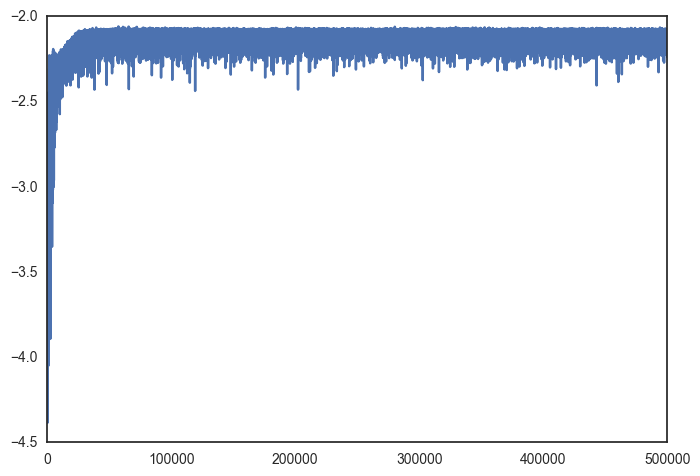

In [8]:
b.plot_elbo()

Looks like convergence has happened! Let's also look at the posterior plot.

What's provided is a `seaborn` swarm plot combined with the 95% HPD and IQR of the posterior distribution.

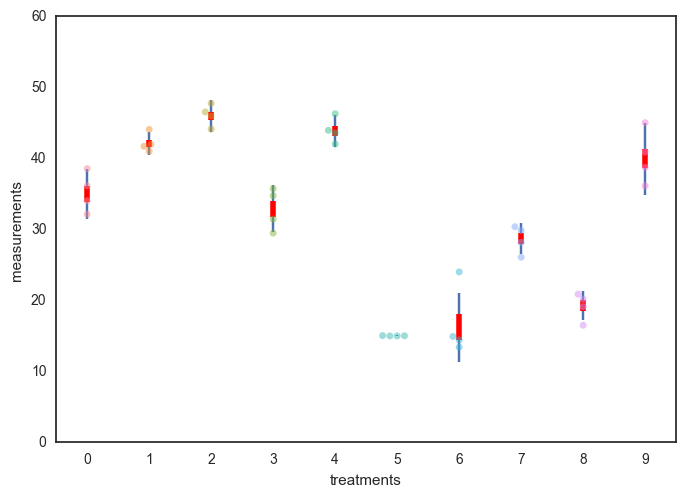

In [13]:
b.plot_posterior()  # can pass in rotate_xticks=True if needed